In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
diabetes_df = pd.read_csv('diabetes.csv')

In [128]:
print("\nDiabetes Dataset Columns:") 
print(diabetes_df.columns) 


Diabetes Dataset Columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [130]:
print("Missing values before cleaning:")
print("Diabetes Dataset:", diabetes_df.isnull().sum().sum())

Missing values before cleaning:
Diabetes Dataset: 0


In [132]:
print("Missing values after cleaning:")
print("Heart Dataset:", diabetes_df.isnull().sum().sum())

Missing values after cleaning:
Heart Dataset: 0


In [134]:
def perform_eda(df, title):
    print(f"EDA for {title}")
    print(df.head())
    print(df.info())
    print(df.describe())
    plt.show()

perform_eda(diabetes_df, "Diabetes")

EDA for Diabetes
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose     

In [136]:
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    # Handle missing values (if any)
    X.fillna(X.mean(), inplace=True)
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [138]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = preprocess_data(diabetes_df, 'Outcome')

In [140]:
model=LogisticRegression()

In [142]:
model.fit(X_train_heart, y_train_heart)
y_pred = model.predict(X_test_heart)
accuracy = accuracy_score(y_test_heart, y_pred)
print(f"Accuracy of {model}: {accuracy}")
print(confusion_matrix(y_test_heart, y_pred))
print(classification_report(y_test_heart, y_pred))

Accuracy of LogisticRegression(): 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [144]:
def plot_feature_importance(model, X_train, title):
    importance = model.coef_[0]
    features = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
    features = features.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(6,4))
    sns.barplot(x='Importance', y='Feature', data=features)
    plt.title(f"Feature Importance for {title}")
    plt.show()

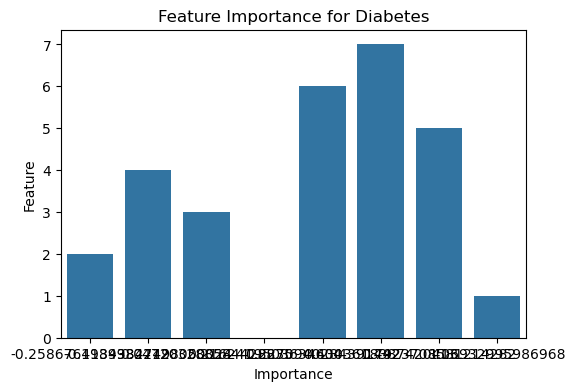

In [146]:
rf_diabetes = LogisticRegression()
rf_diabetes.fit(X_train_diabetes, y_train_diabetes)
plot_feature_importance(rf_diabetes, pd.DataFrame(X_train_diabetes), "Diabetes")

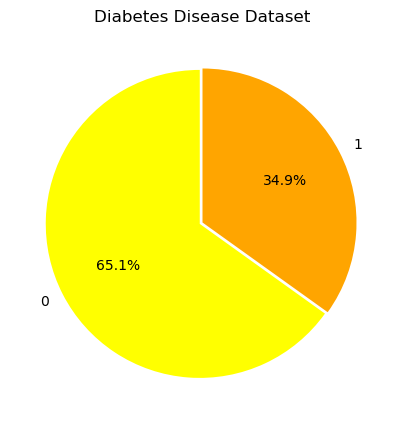

In [148]:
def plot_pie_chart(df, target_column, title): 
    counts = df[target_column].value_counts() 
    plt.figure(figsize=(6, 5)) 
    colors=['yellow','orange']
    explode=(0.02,0)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,colors=colors,explode=explode) 
    plt.title(title) 
    plt.show() 
# Plotting pie charts 
plot_pie_chart(diabetes_df, 'Outcome', 'Diabetes Disease Dataset') 

In [150]:
input_data_diabetes = (0,120,66,49,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_diabetes_as_numpy_array = np.asarray(input_data_diabetes)

# reshape the array as we are predicting for one instance
input_data_diabetes_reshaped = input_data_diabetes_as_numpy_array.reshape(1,-1)

model=LogisticRegression()

model.fit(X_train_diabetes, y_train_diabetes)
y_pred = model.predict(X_test_diabetes)
accuracy = accuracy_score(y_test_diabetes, y_pred)
print(f"Accuracy of {model}: {accuracy}")
print(confusion_matrix(y_test_diabetes, y_pred))
print(classification_report(y_test_diabetes, y_pred))
prediction = model.predict(input_data_diabetes_reshaped)
if (prediction[0] == 0):
    print(f'The person doesnot have diabetes disease according to {model}')
else:
    print(f'The person is having diabetes disease according to {model}')
           
# Example usage with dummy data (replace with actual data)
X_train = np.random.rand(100, 8) 
y_train = np.random.randint(2, size=100) 
X_test = np.random.rand(20, 8) 
y_test = np.random.randint(2, size=20) 


Accuracy of LogisticRegression(): 0.7532467532467533
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

The person is having diabetes disease according to LogisticRegression()


In [152]:
import pickle

In [154]:
filename = 'diabetes_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [156]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_disease_model.sav', 'rb'))

In [158]:
for column in diabetes_df.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome
